In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split

In [62]:
from wsgiref import headers
from requests import head


df_1 = pd.read_csv(
  'jumping_jacks/jj1.csv'
)

df_2 = pd.read_csv(
  'jumping_jacks/jj2.csv'
)

df_3 = pd.read_csv(
  'jumping_jacks/jj3.csv'
)


df_4 = pd.read_csv(
  'jumping_jacks/jj4.csv'
)


df_5 = pd.read_csv(
  'jumping_jacks/jj5.csv'
)

df_6 = pd.read_csv(
  'jumping_jacks/jj6.csv'
)

df_7 = pd.read_csv(
  'jumping_jacks/jj7.csv'
)

df_8 = pd.read_csv(
  'jumping_jacks/jj8.csv'
)

df_9 = pd.read_csv(
  'jumping_jacks/jj9.csv'
)

df_10 = pd.read_csv(
  'jumping_jacks/jj10.csv'
)

df_11 = pd.read_csv(
  'jumping_jacks/jj11.csv',
)

column_names = [
  'user_id',
  'activity',
  'timestamp',
  'x_axis',
  'y_axis',
  'z_axis'
]

df_12 = pd.read_csv(
  "all_kind_raw.txt",
  header=None,
  names=column_names
)

In [63]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], axis=0, sort=False)

df.rename(
    columns = {
    "Time (s)": "timestamp", 
    "Linear Acceleration x (m/s^2)": "x_axis", 
    "Linear Acceleration y (m/s^2)": "y_axis", 
    "Linear Acceleration z (m/s^2)": "z_axis",
    },
  inplace=True
)
df.insert(0, "user_id", 99) # my own fictiv user_id
df.insert(1, "activity", "Jumping Jacks")
df.dropna(axis=0, how='any', inplace=True)
df.drop(columns=['Absolute acceleration (m/s^2)'], axis=1, inplace=True)

print(f"Shape: {df.shape}")
df.head()

Shape: (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,99,Jumping Jacks,0.00118,0.167634,0.071859,0.231791
1,99,Jumping Jacks,0.01125,0.123204,0.079774,0.119973
2,99,Jumping Jacks,0.02132,0.177499,0.162909,0.000261
3,99,Jumping Jacks,0.03139,0.145734,0.191112,-0.285651
4,99,Jumping Jacks,0.04146,0.145204,0.218535,-0.493260


In [64]:
sitting_df = df_12[df_12["activity"] == "Sitting"][:len(df)]
sitting_df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
sitting_df['z_axis'] = sitting_df.z_axis.astype(np.float64)
sitting_df.dropna(axis=0, how='any', inplace=True)
sitting_df.index.name = None 

print("Shape: ", sitting_df.shape)
sitting_df.head()

Shape:  (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
221335,27,Sitting,12363992261000,2.60,9.66,1.035146
221336,27,Sitting,12364042279000,2.68,9.53,0.503953
221337,27,Sitting,12364092267000,3.49,8.89,0.762740
221338,27,Sitting,12364142316000,3.64,9.38,0.926184
221339,27,Sitting,12364192273000,2.91,9.34,1.035146


In [65]:
standing_df = df_12[df_12["activity"] == "Standing"][:len(df)]

standing_df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
standing_df['z_axis'] = standing_df.z_axis.astype(np.float64)
standing_df.dropna(axis=0, how='any', inplace=True)

standing_df.index.name = None 

print("Shape: ", standing_df.shape)
standing_df.head()

Shape:  (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
223434,27,Standing,12535892255000,-1.88,9.85,-0.231546
223435,27,Standing,12535942273000,-0.19,9.92,-0.572055
223436,27,Standing,12535992231000,-0.61,10.27,-0.885323
223437,27,Standing,12536042310000,0.76,10.57,-1.757025
223438,27,Standing,12536092206000,0.42,9.47,-1.116869


In [66]:
walking_df = df_12[df_12["activity"] == "Walking"][:len(df)]

walking_df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
walking_df['z_axis'] = walking_df.z_axis.astype(np.float64)
walking_df.dropna(axis=0, how='any', inplace=True)

walking_df.index.name = None 

print("Shape: ", walking_df.shape)
walking_df.head()

Shape:  (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
597,33,Walking,49394992294000,0.844462,8.008764,2.792171
598,33,Walking,49395102310000,1.116869,8.621680,3.786457
599,33,Walking,49395202316000,-0.503953,16.657684,1.307553
600,33,Walking,49395302292000,4.794363,10.760075,-1.184970
601,33,Walking,49395412338000,-0.040861,9.234595,-0.694638


In [67]:
jogging_df = df_12[df_12["activity"] == "Jogging"][:len(df)]

jogging_df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
jogging_df['z_axis'] = jogging_df.z_axis.astype(np.float64)
jogging_df.dropna(axis=0, how='any', inplace=True)

jogging_df.index.name = None 

print("Shape: ", jogging_df.shape)
jogging_df.head()

Shape:  (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [68]:
upstairs_df = df_12[df_12["activity"] == "Upstairs"][:len(df)]

upstairs_df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
upstairs_df['z_axis'] = upstairs_df.z_axis.astype(np.float64)
upstairs_df.dropna(axis=0, how='any', inplace=True)

upstairs_df.index.name = None 

print("Shape: ", upstairs_df.shape)
upstairs_df.head()

Shape:  (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
1161,33,Upstairs,49560572311000,10.119919,4.331271,-3.786457
1162,33,Upstairs,49560682449000,4.862464,3.909040,-2.792171
1163,33,Upstairs,49560782303000,9.466142,13.402422,-3.827318
1164,33,Upstairs,49560842209000,5.747787,7.627395,-3.146300
1165,33,Upstairs,49560942184000,2.301839,8.921328,-3.023717


In [69]:
downstairs_df = df_12[df_12["activity"] == "Downstairs"][:len(df)]

downstairs_df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
downstairs_df['z_axis'] = downstairs_df.z_axis.astype(np.float64)
downstairs_df.dropna(axis=0, how='any', inplace=True)

downstairs_df.index.name = None 

print("Shape: ", downstairs_df.shape)
downstairs_df.head()

Shape:  (10928, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
1769,33,Downstairs,49646322311000,-0.040861,4.985047,6.510526
1770,33,Downstairs,49646422317000,-0.463092,4.372132,7.436710
1771,33,Downstairs,49646522323000,-0.299648,4.603678,6.510526
1772,33,Downstairs,49646572281000,-0.272407,4.481094,6.360703
1773,33,Downstairs,49646672317000,-1.525479,5.175732,7.164303


In [70]:
df = pd.concat([df, sitting_df, standing_df, walking_df, jogging_df, upstairs_df, downstairs_df], axis=0, sort=False)
print("Shape: ", df.shape)
df.head()

Shape:  (76496, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,99,Jumping Jacks,0.00118,0.167634,0.071859,0.231791
1,99,Jumping Jacks,0.01125,0.123204,0.079774,0.119973
2,99,Jumping Jacks,0.02132,0.177499,0.162909,0.000261
3,99,Jumping Jacks,0.03139,0.145734,0.191112,-0.285651
4,99,Jumping Jacks,0.04146,0.145204,0.218535,-0.493260


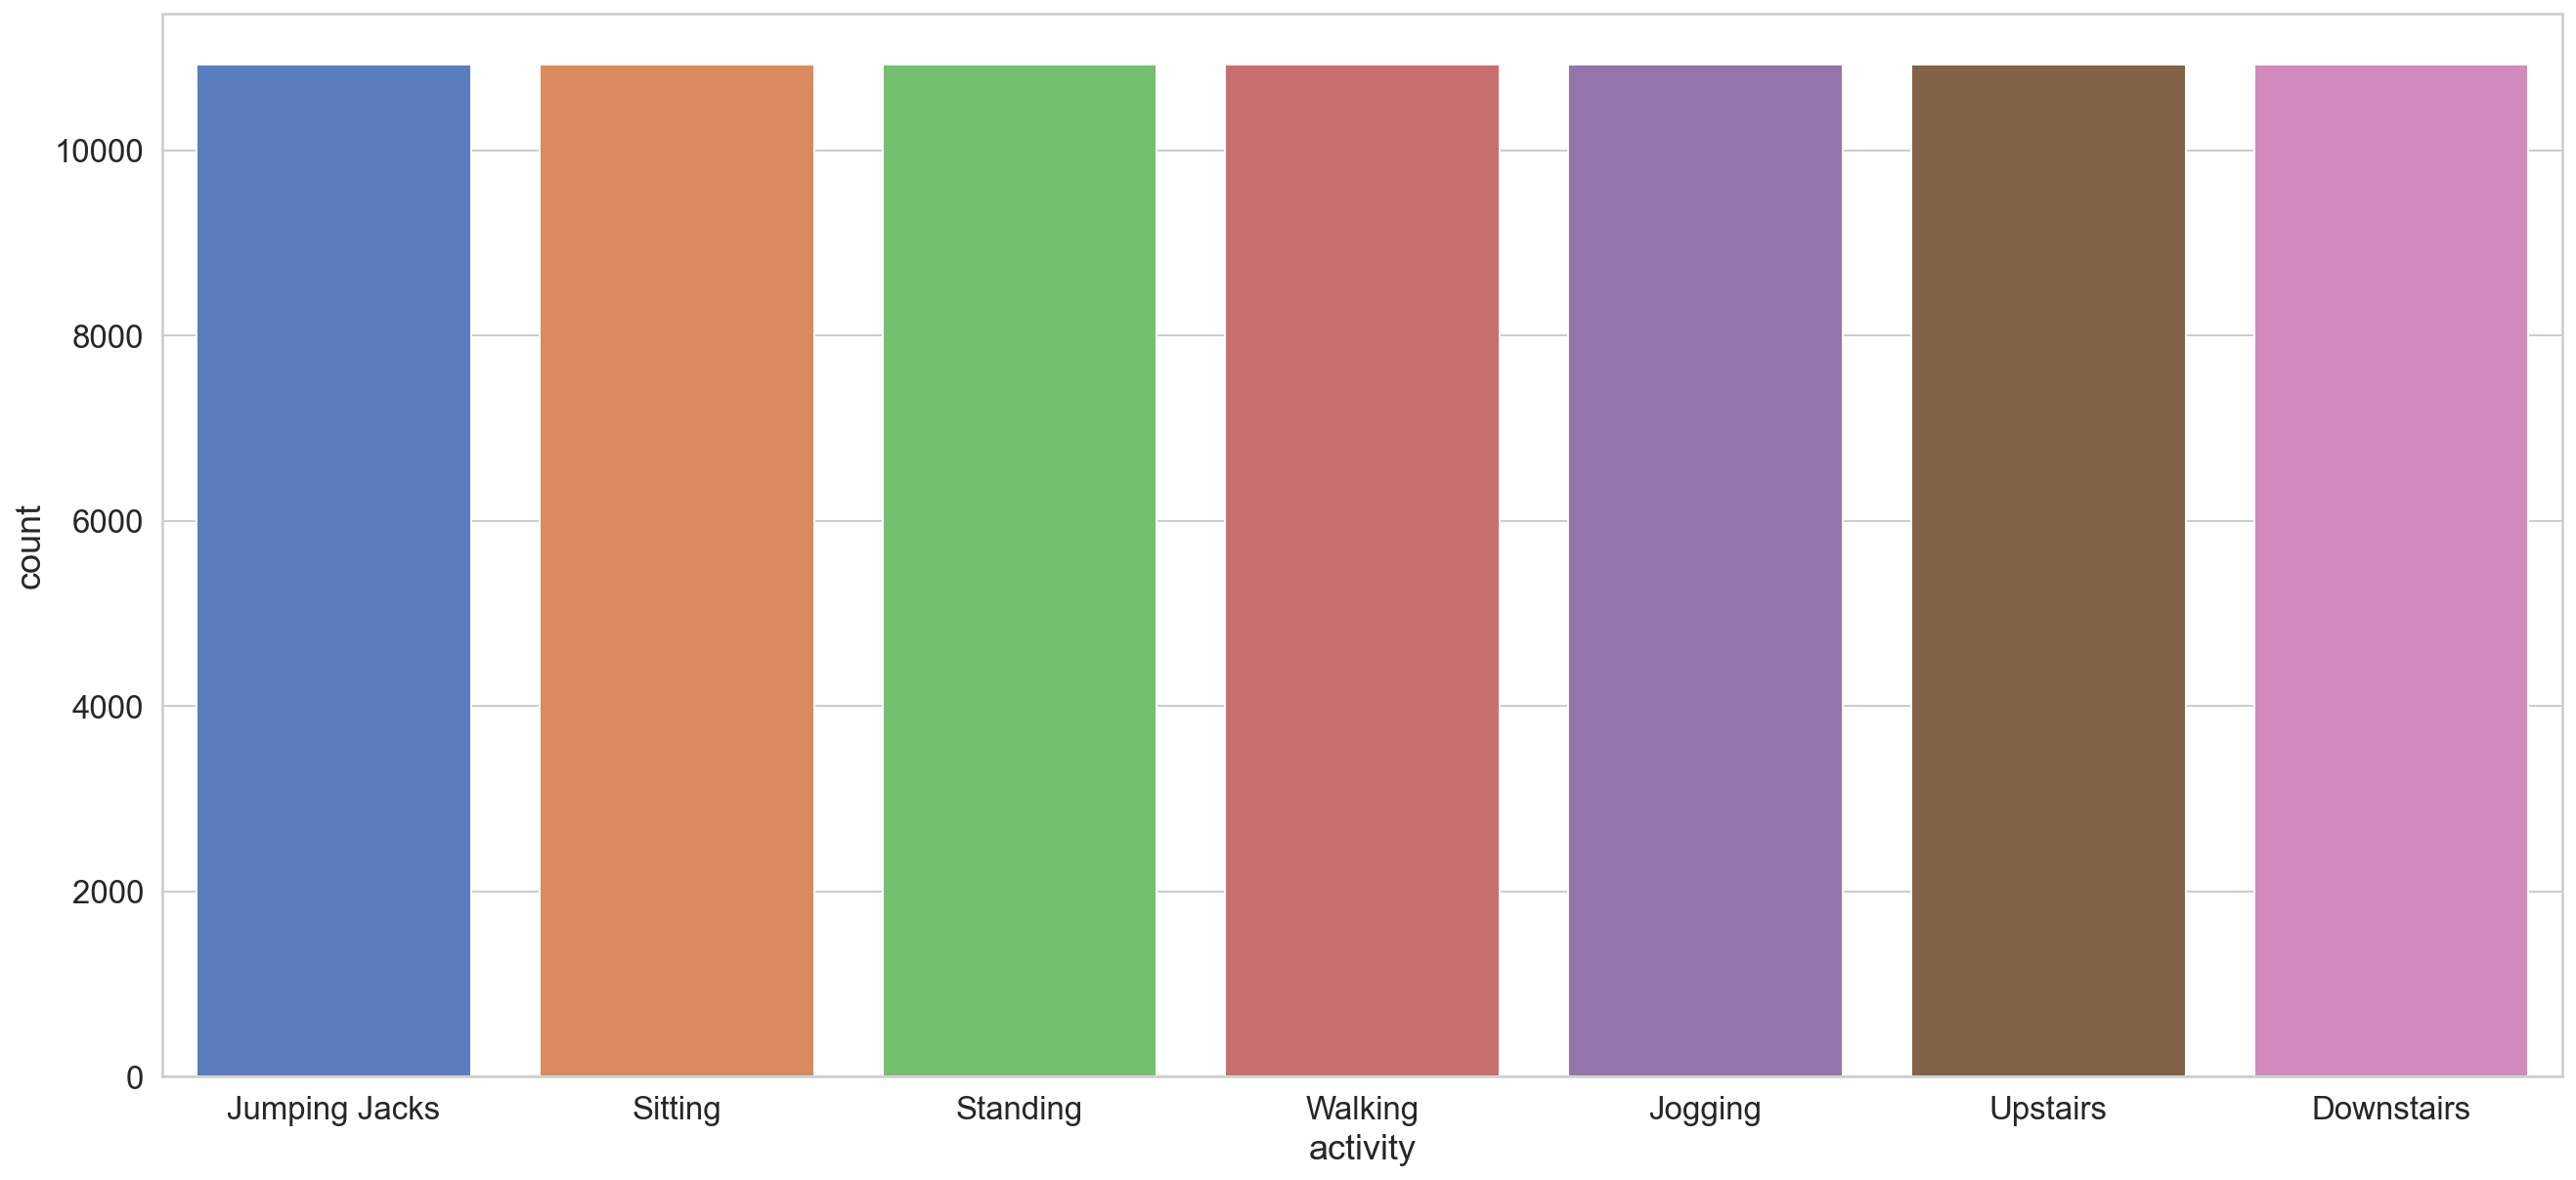

In [71]:
sns.countplot(x = 'activity',
              data = df,
              order = df.activity.value_counts().index);

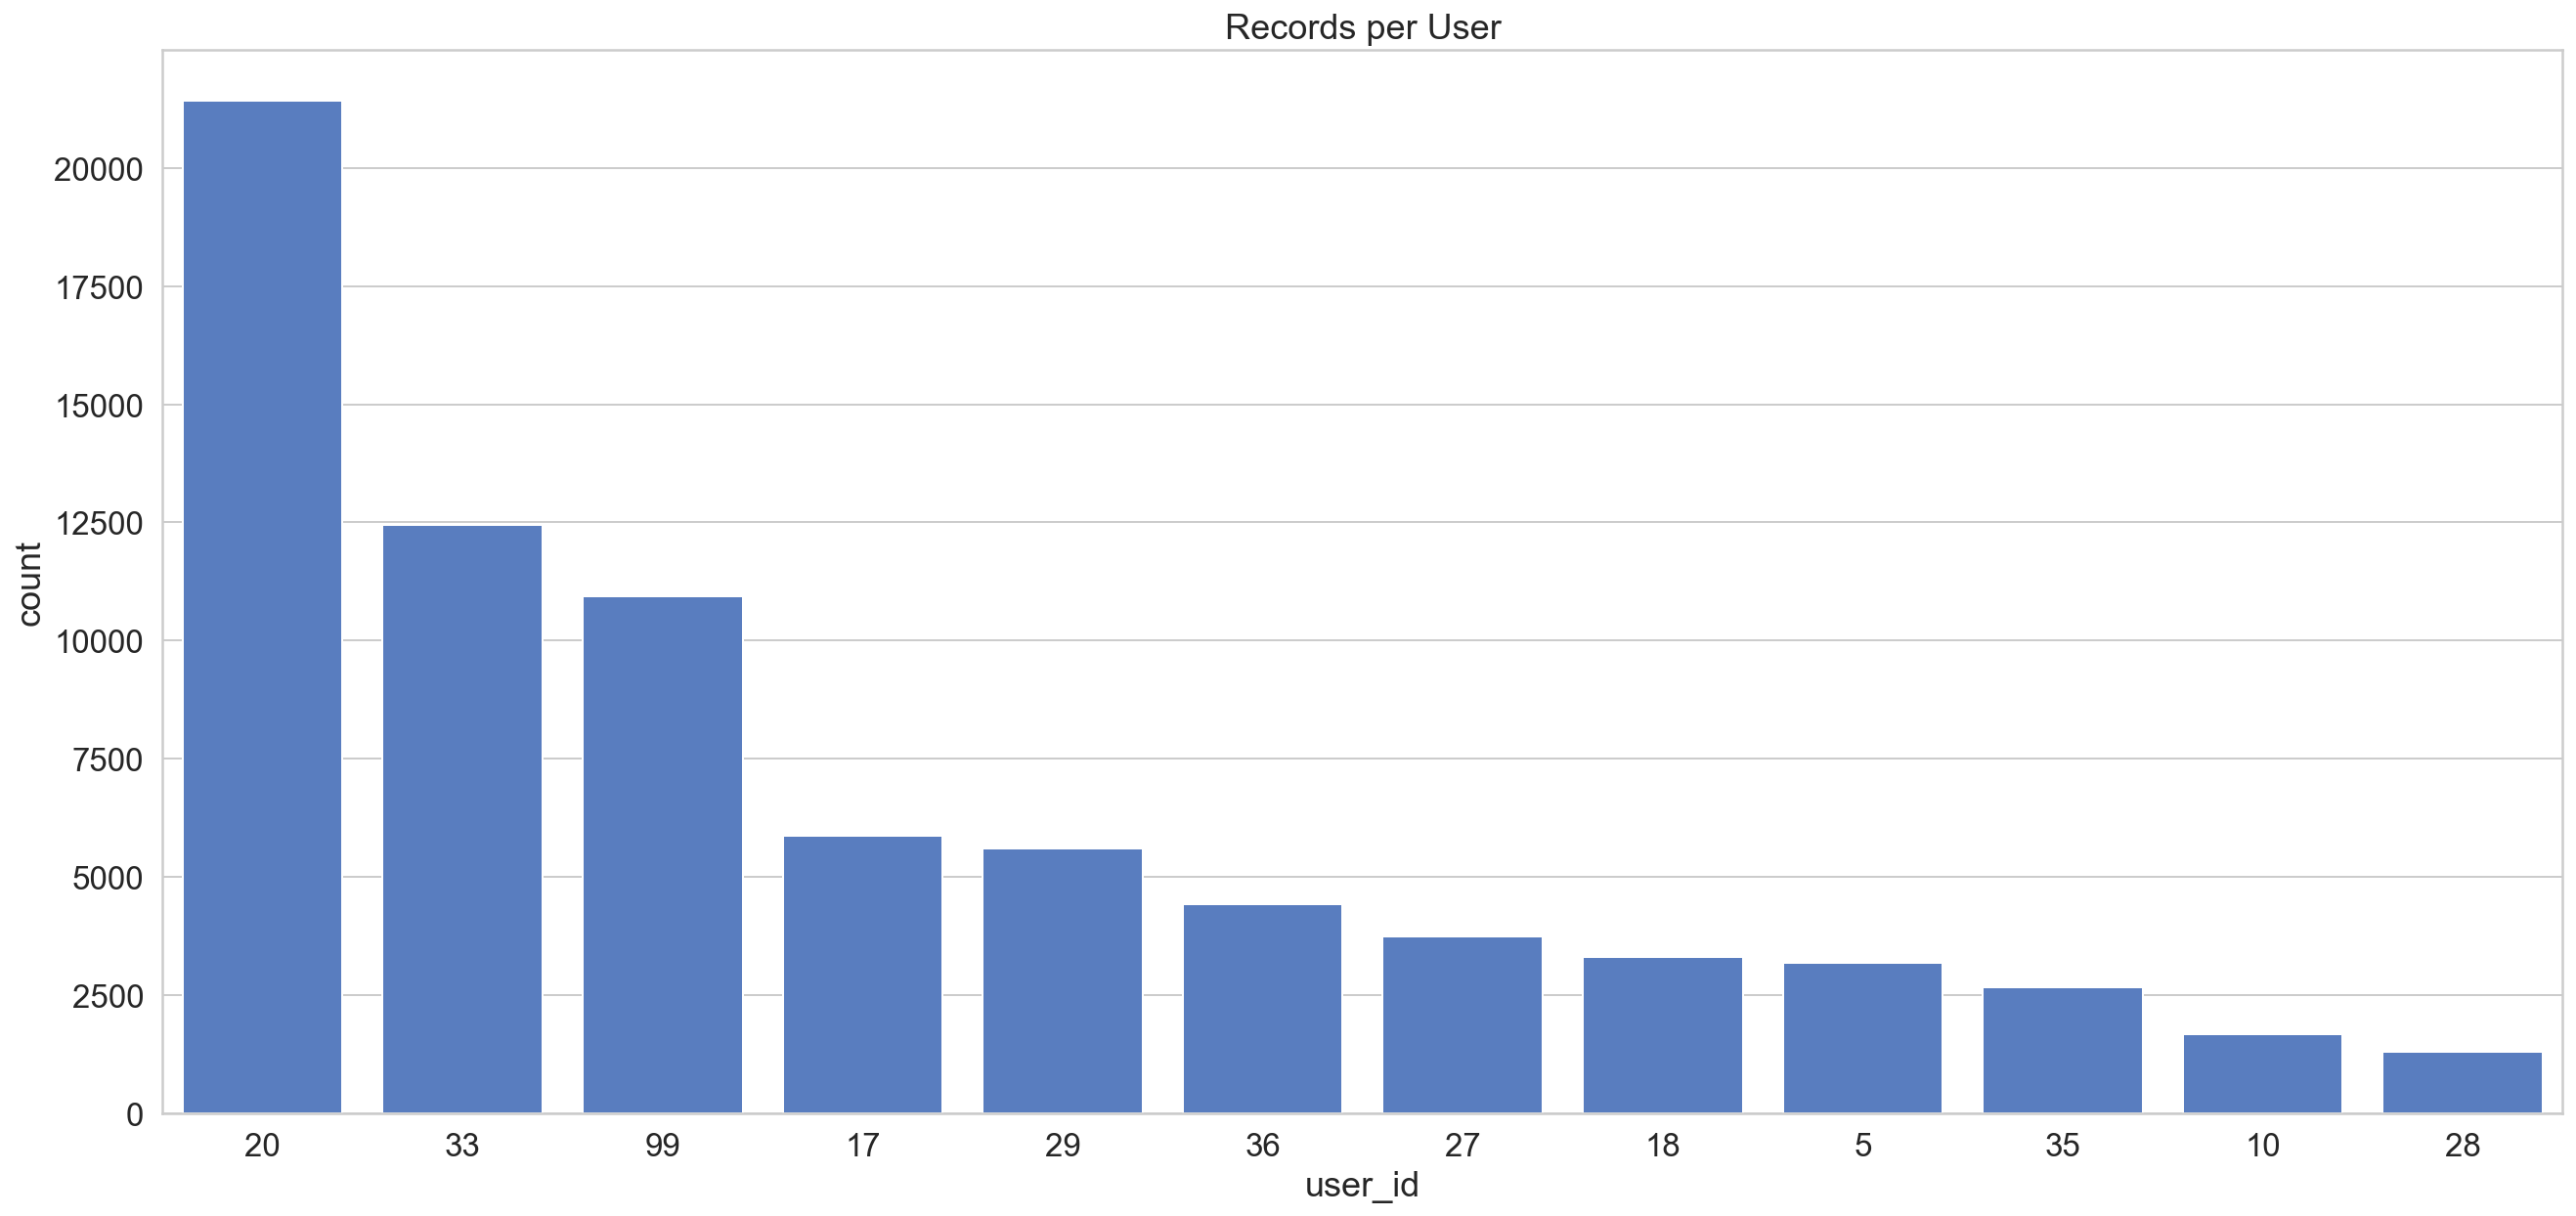

In [72]:
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per User");

In [73]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x_axis', 'y_axis', 'z_axis']][:200]
    axis = data.plot(
        subplots=True, 
        figsize=(16, 12),
        title=activity
        )
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

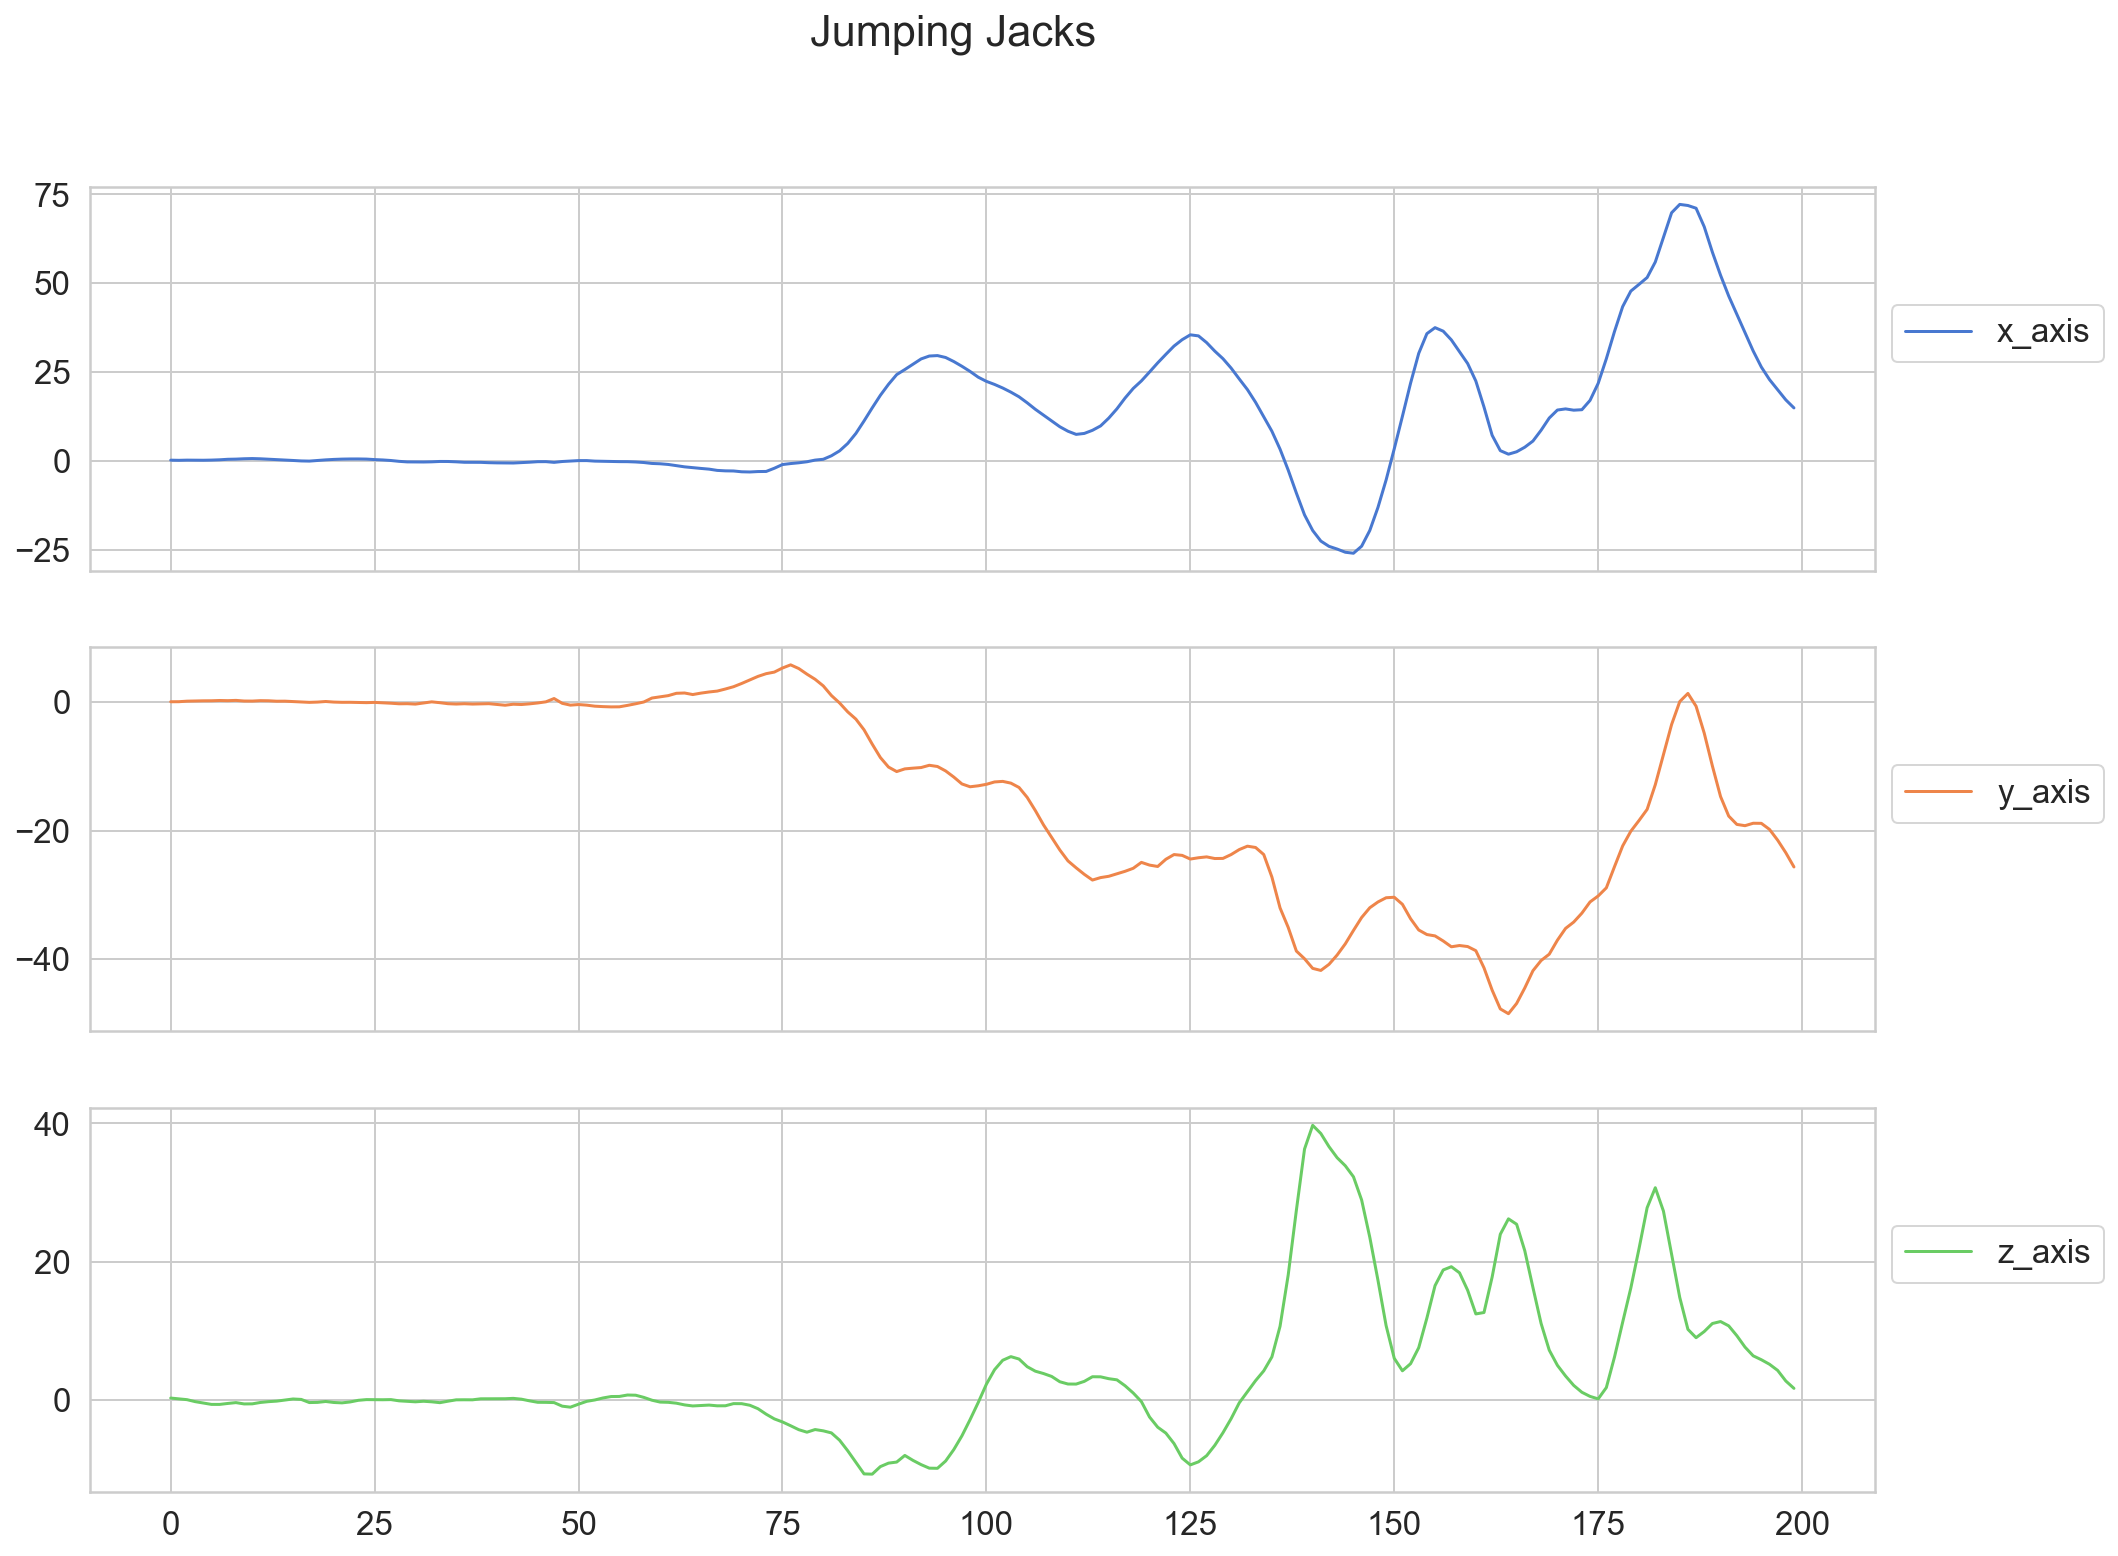

In [74]:
plot_activity("Jumping Jacks", df);

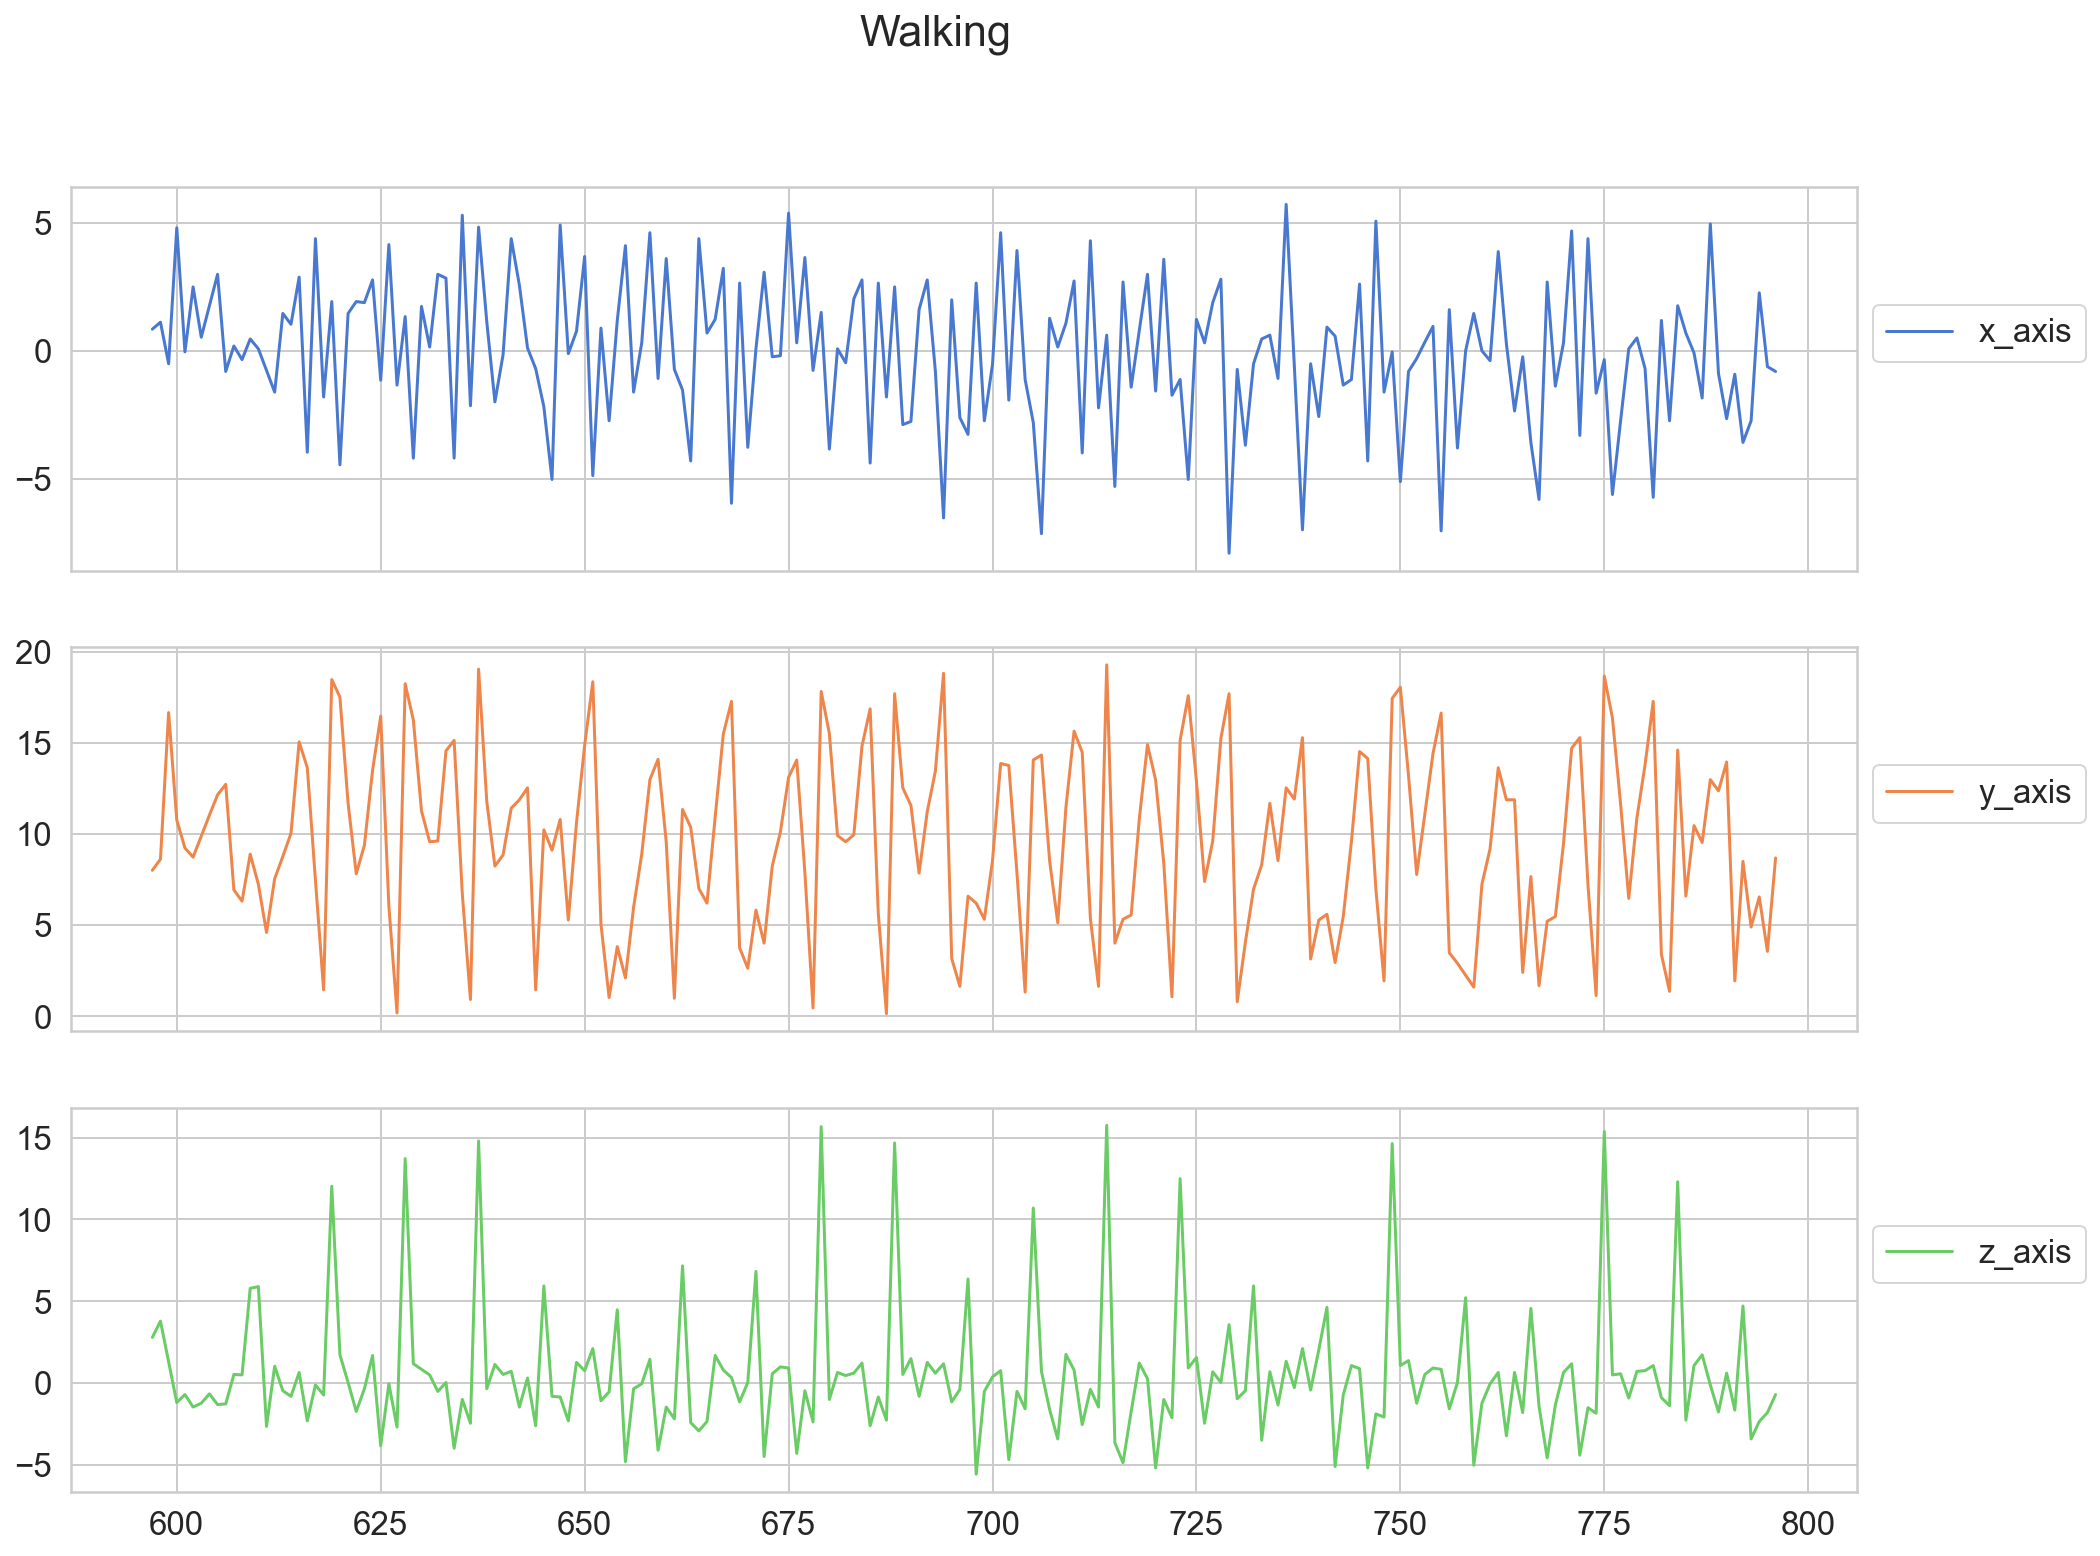

In [75]:
plot_activity("Walking", df);

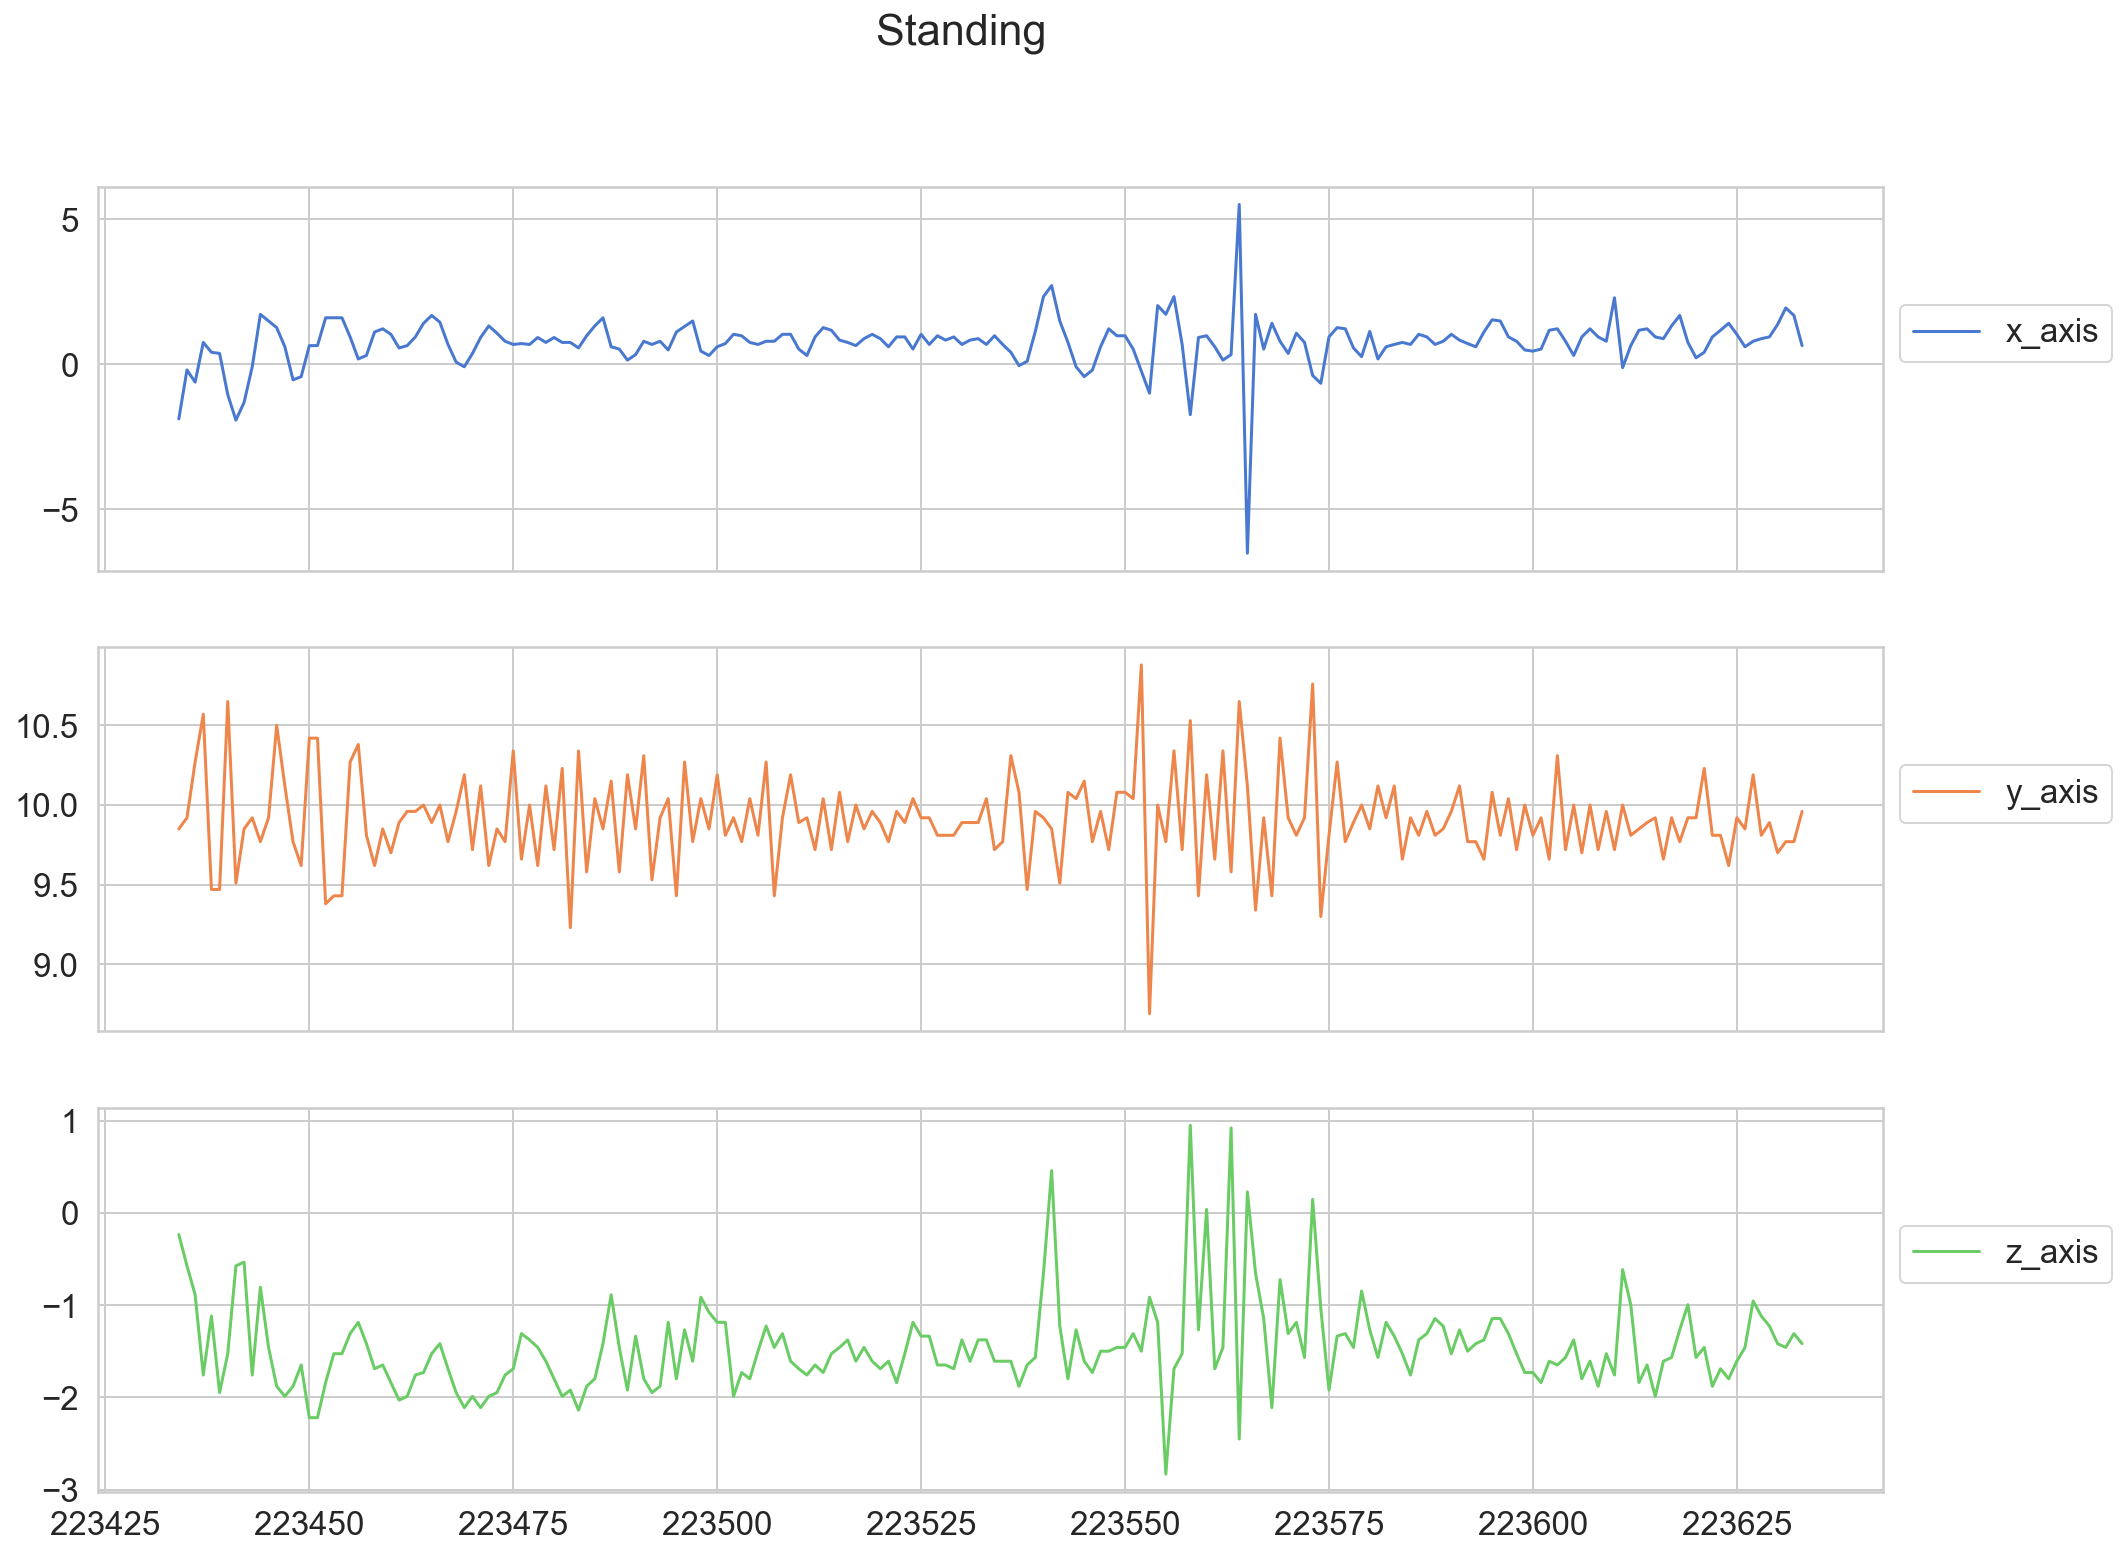

In [76]:
plot_activity("Standing", df);

In [77]:
# Splitting Data in 80% to 20% for training and testing
df_train, df_test = train_test_split(df, test_size=0.2)

df_train.sort_values(by=['user_id', 'activity', 'timestamp'], inplace=True)
df_test.sort_values(by=['user_id', 'activity', 'timestamp'], inplace=True)

print(f"Train Shape: {df_train.shape}\nTest Shape: {df_test.shape}")
df_train.head(30)

Train Shape: (61196, 6)
Test Shape: (15300, 6)


,user_id,activity,timestamp,x_axis,y_axis,z_axis
397264,5,Sitting,3.041222e+12,4.21,2.98,8.117727
397265,5,Sitting,3.041272e+12,4.29,3.02,8.158588
397266,5,Sitting,3.041322e+12,4.29,2.83,8.076866
397267,5,Sitting,3.041372e+12,4.25,2.87,8.158588
397268,5,Sitting,3.041432e+12,4.25,2.87,8.117727
397270,5,Sitting,3.041492e+12,4.33,2.96,8.158588
397269,5,Sitting,3.041492e+12,4.33,2.96,8.158588
397271,5,Sitting,3.041592e+12,4.29,2.91,8.158588
397272,5,Sitting,3.041642e+12,4.25,2.91,8.158588
397273,5,Sitting,3.041692e+12,4.29,2.91,8.199450


In [78]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x_axis', 'y_axis', 'z_axis']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

df_train.head()

/Users/anthony/.virtualenvs/ml_tut/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/Users/anthony/.virtualenvs/ml_tut/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,user_id,activity,timestamp,x_axis,y_axis,z_axis
397264,5,Sitting,3.041222e+12,0.4160,-0.651381,1.102847
397265,5,Sitting,3.041272e+12,0.4288,-0.646351,1.109769
397266,5,Sitting,3.041322e+12,0.4288,-0.670243,1.095925
397267,5,Sitting,3.041372e+12,0.4224,-0.665213,1.109769
397268,5,Sitting,3.041432e+12,0.4224,-0.665213,1.102847


In [79]:
# TODO: Create a time-series dataset
# Create training and test sets

# Create with 80% of the data X_train, y_train where X_train is x_axis and y_axis and z_axis and y_train is valid column.
# Then create with the remining 20% of the data X_test, y_test where X_test is x_axis and y_axis and z_axis and y_test is valid column.

from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.activity, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.activity, 
    TIME_STEPS, 
    STEP
)

In [80]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1525, 200, 3) (1525, 1) (378, 200, 3) (378, 1)


In [81]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [82]:
print(X_train.shape, y_train.shape)

(1525, 200, 3) (1525, 7)


In [83]:
print(X_train.shape[1], X_train.shape[2])

200 3


In [84]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5)) # Dropout layer to prevent overfitting
model.add(keras.layers.Dense(units=128, activation='relu')) # This hidden layer has as activation function ReLU instaed of the default linear
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax')) # This is a output layer with as activation function softmax
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [91]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1, # 10% of the data will be used for validation
    shuffle=False
)

Epoch 1/20
43/43 [==============================] - 7s 157ms/step - loss: 2.0164 - acc: 0.4679 - val_loss: 14.5346 - val_acc: 0.0000e+00
Epoch 2/20
43/43 [==============================] - 6s 143ms/step - loss: 1.2981 - acc: 0.5277 - val_loss: 1.2242 - val_acc: 0.2680
Epoch 3/20
43/43 [==============================] - 9s 201ms/step - loss: 1.0976 - acc: 0.5860 - val_loss: 0.2643 - val_acc: 1.0000
Epoch 4/20
43/43 [==============================] - 8s 189ms/step - loss: 0.9560 - acc: 0.6450 - val_loss: 0.0658 - val_acc: 1.0000
Epoch 5/20
43/43 [==============================] - 7s 161ms/step - loss: 0.9575 - acc: 0.6217 - val_loss: 0.0395 - val_acc: 1.0000
Epoch 6/20
43/43 [==============================] - 7s 153ms/step - loss: 0.9388 - acc: 0.6312 - val_loss: 0.0379 - val_acc: 1.0000
Epoch 7/20
43/43 [==============================] - 6s 132ms/step - loss: 0.9427 - acc: 0.5984 - val_loss: 0.0193 - val_acc: 1.0000
Epoch 8/20
43/43 [==============================] - 6s 131ms/step - los

In [92]:
print(history.history)

{'loss': [2.016448497772217, 1.2980748414993286, 1.0976290702819824, 0.9559927582740784, 0.9574501514434814, 0.9387862682342529, 0.9427170753479004, 0.8464714288711548, 0.8293241858482361, 0.7687085270881653, 0.7418684959411621, 0.6504971981048584, 0.8422017693519592, 1.045348048210144, 0.8535112738609314, 0.7139474749565125, 0.6559120416641235, 0.5831704139709473, 1.1077600717544556, 0.8208303451538086], 'acc': [0.46793001890182495, 0.5276967883110046, 0.5860058069229126, 0.6450437307357788, 0.6217201352119446, 0.6311953067779541, 0.5983964800834656, 0.6479591727256775, 0.6778425574302673, 0.6865889430046082, 0.6953352689743042, 0.7303206920623779, 0.6705539226531982, 0.6115160584449768, 0.6457725763320923, 0.7419825196266174, 0.7609329223632812, 0.7572886347770691, 0.6166180968284607, 0.6997084617614746], 'val_loss': [14.534611701965332, 1.2242283821105957, 0.2642510235309601, 0.06580215692520142, 0.03949617221951485, 0.03785061463713646, 0.019338851794600487, 0.02535136602818966, 0.

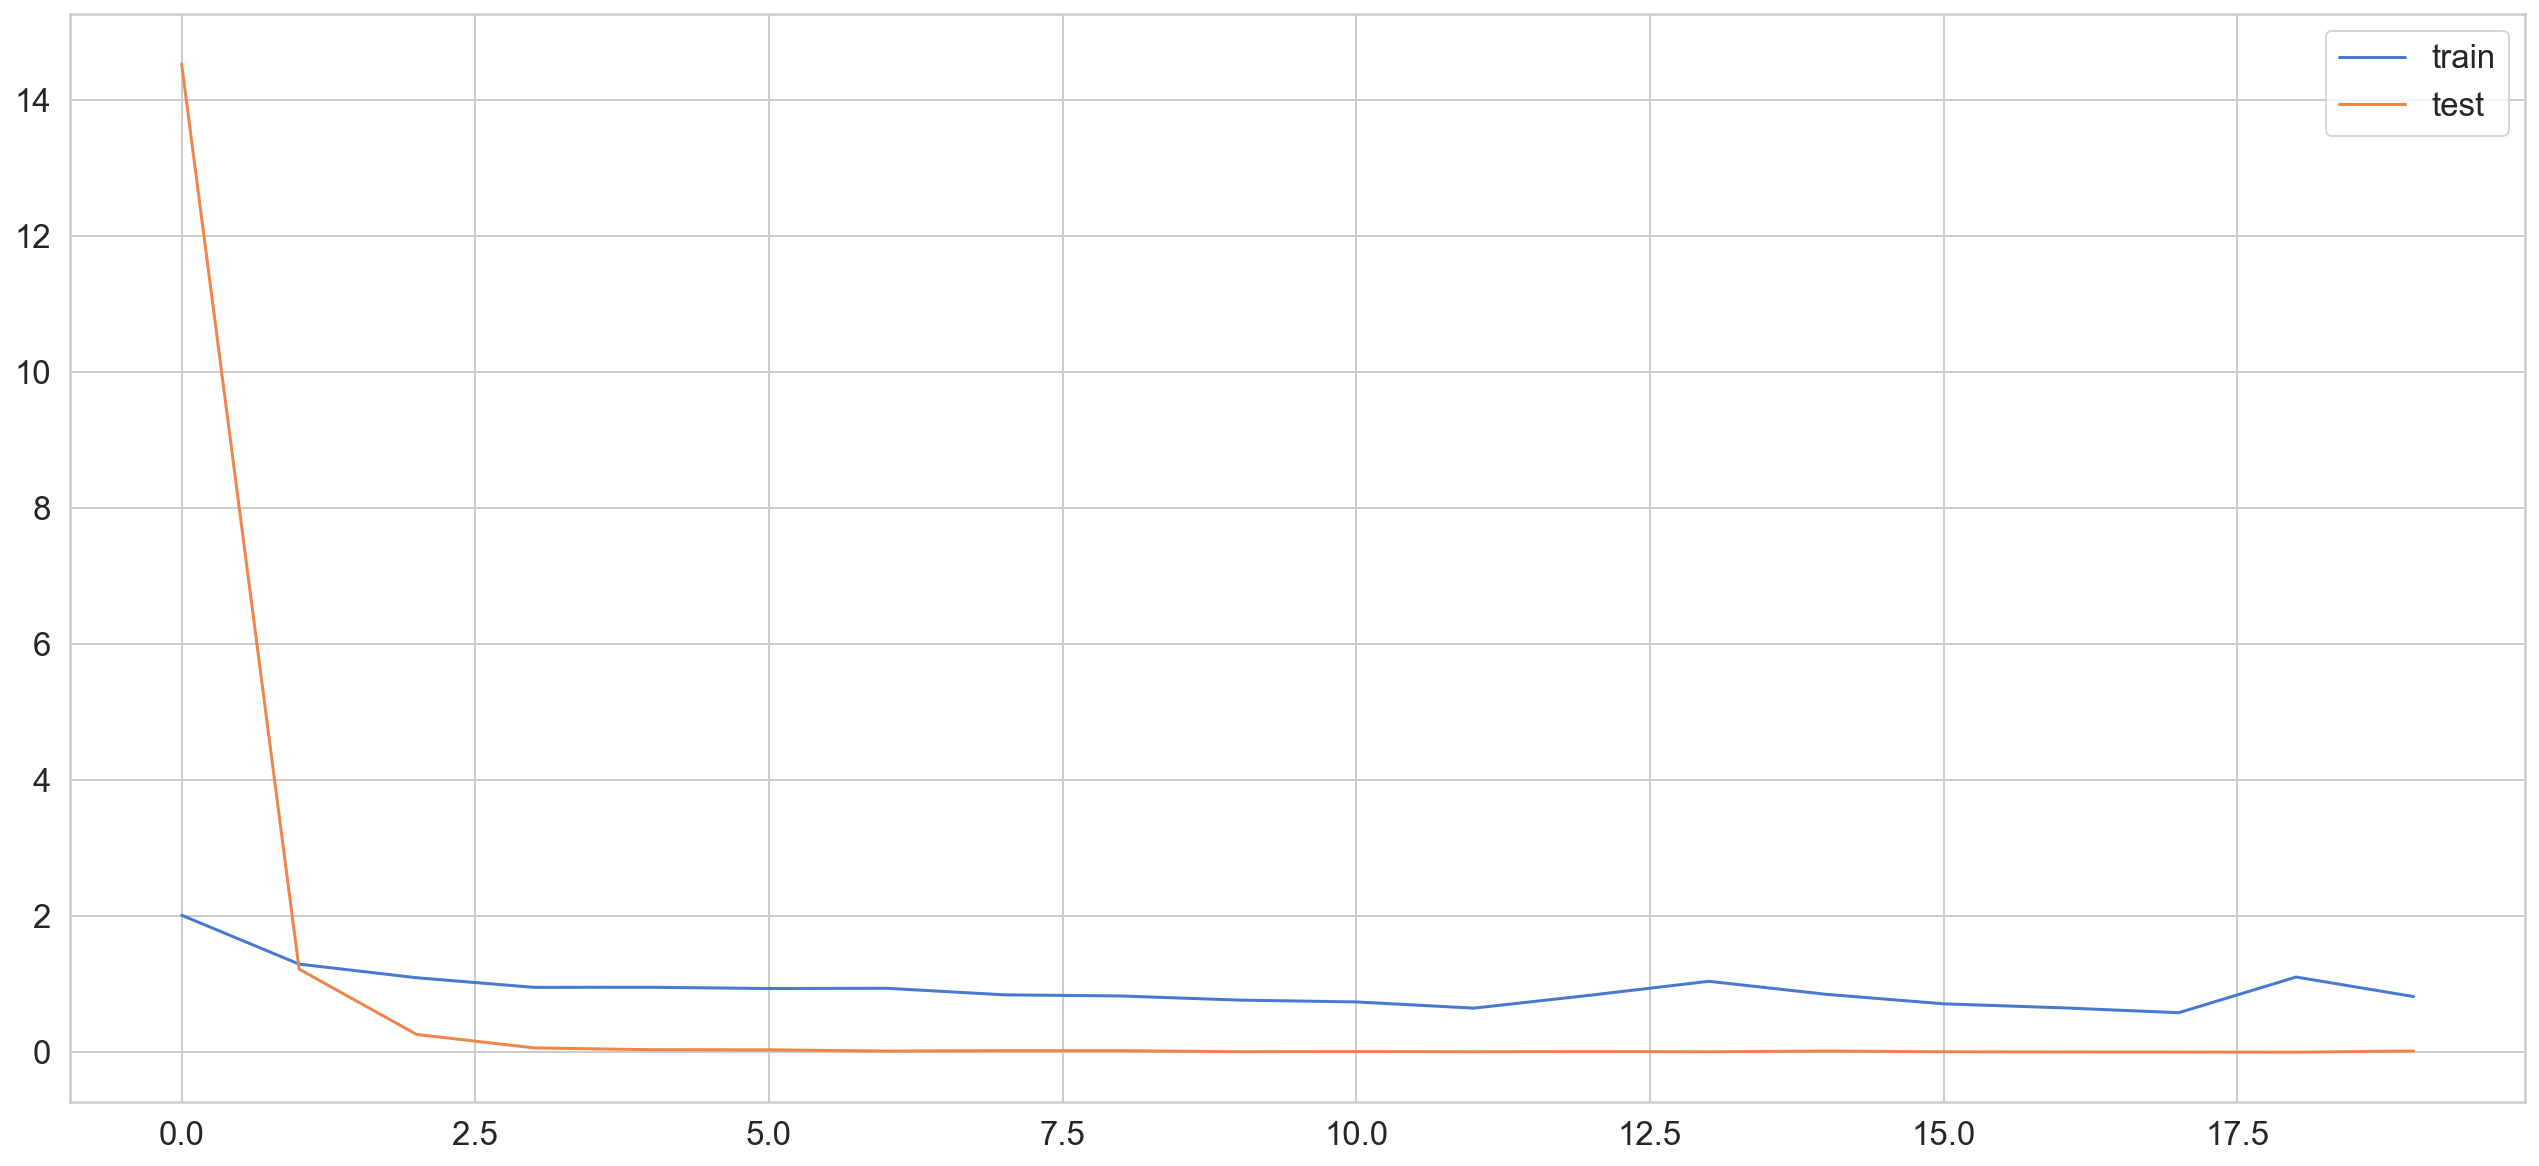

In [93]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [94]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 1s 57ms/step - loss: 0.7357 - acc: 0.7116


[0.7357327342033386, 0.7116402387619019]

In [95]:
y_pred = model.predict(X_test)
print("y_pred: ", y_pred)

12/12 [==============================] - 1s 59ms/step
y_pred:  [[3.8727123e-04 7.2441646e-04 9.3826908e-05 ... 1.1232957e-03
  8.1799204e-05 8.8276814e-05]
 [3.8945006e-04 7.1021629e-04 9.0773006e-05 ... 1.0912224e-03
  7.9861507e-05 8.9108689e-05]
 [3.9762241e-04 7.5617526e-04 9.7572120e-05 ... 1.1408941e-03
  8.4892192e-05 9.4463241e-05]
 ...
 [3.8946723e-04 1.2623553e-02 9.8667240e-01 ... 5.1566727e-05
  1.4677196e-04 7.3214112e-05]
 [3.0705950e-04 1.0834687e-02 9.8859233e-01 ... 2.4353298e-05
  1.1035993e-04 8.9999987e-05]
 [3.1394622e-04 1.2923677e-02 9.8651254e-01 ... 2.3403139e-05
  1.0555117e-04 8.4743704e-05]]


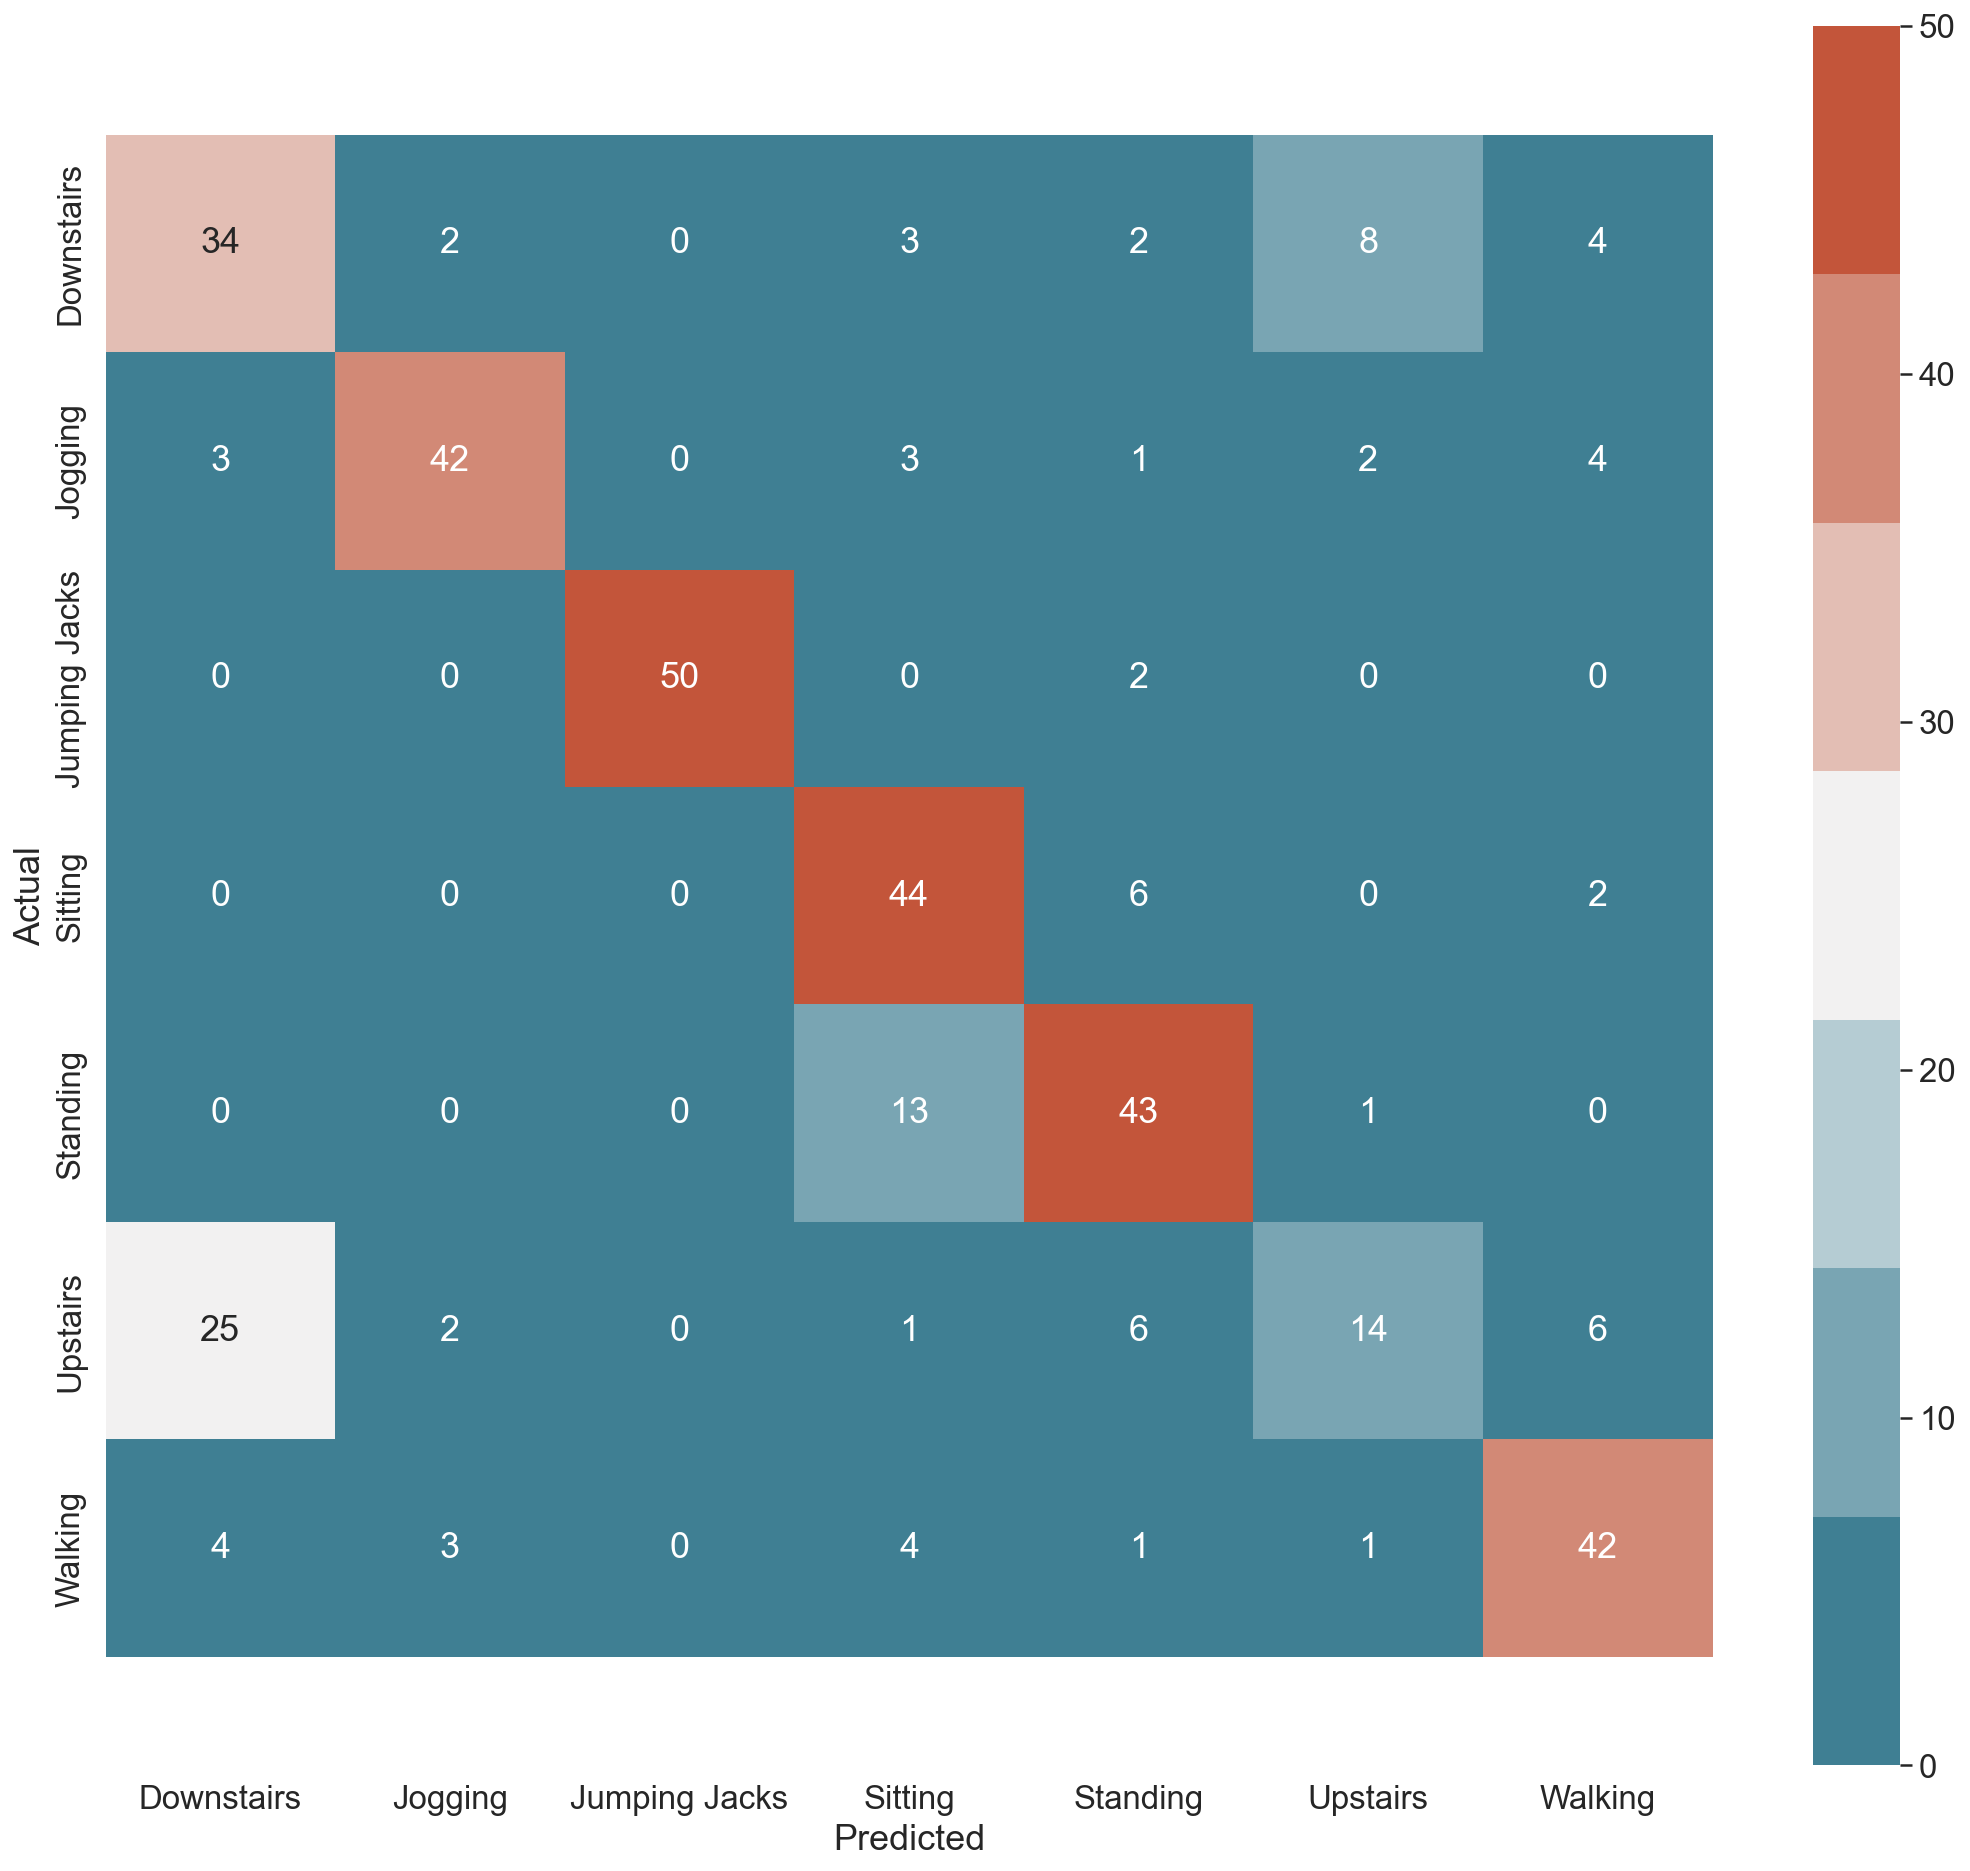

In [96]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show()

plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)